# Results

We will present the results of the metrics in this notebook.

In [1]:
%matplotlib inline

from results_preparation import *

## Sum of the ROI divided by the Total sum

In [2]:
folder = "../../XAI_metrics/metrics/revisited"

### Saliency Maps

#### All Values

Mean value of initial beat: 25.02 +- 18.23%
Mean value of mid beat: 9.56 +- 6.75%
Mean value of final beat: 30.34 +- 9.17%


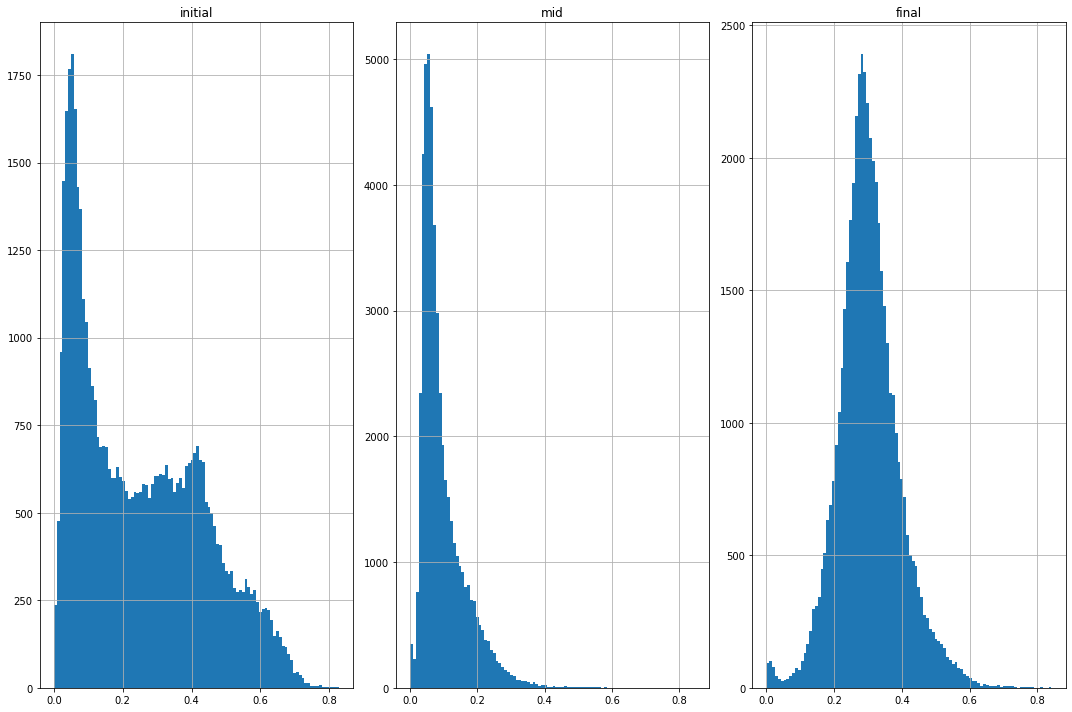

In [3]:
present_values(folder, "saliency")

#### All But 0's

Mean value of initial beat: 25.07 +- 18.21%
Mean value of mid beat: 9.56 +- 6.75%
Mean value of final beat: 30.34 +- 9.17%


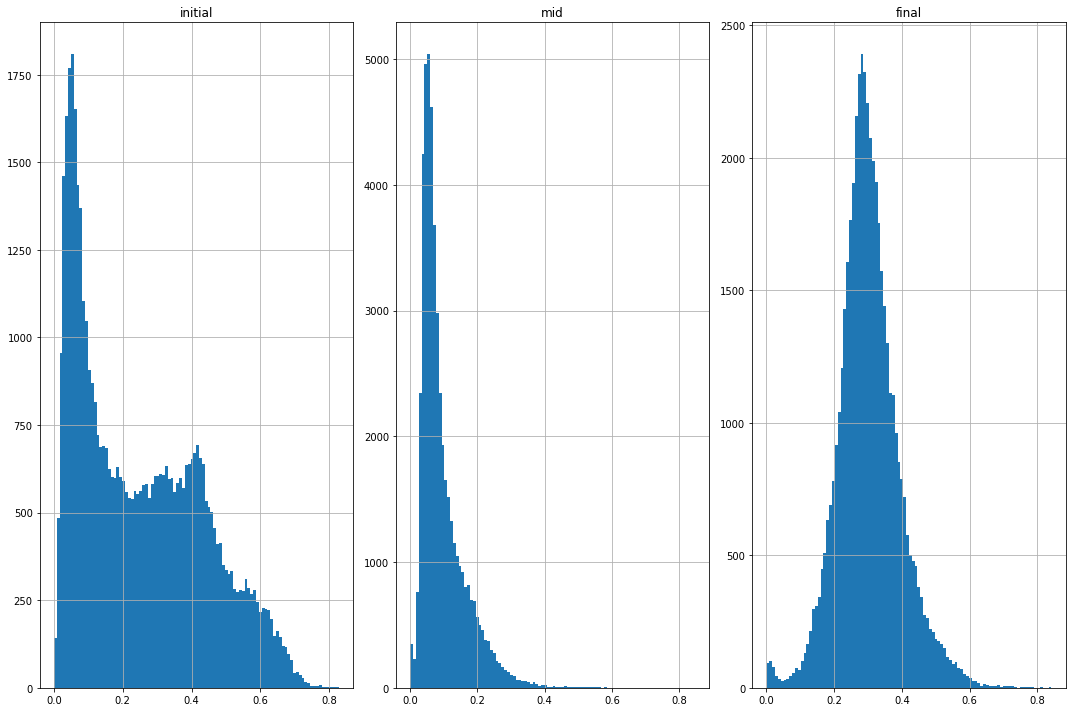

In [4]:
present_values(folder,"saliency", 0)

#### Correct Classification

Mean value of initial beat: 24.35 +- 17.98%
Mean value of mid beat: 9.22 +- 6.29%
Mean value of final beat: 30.27 +- 8.90%


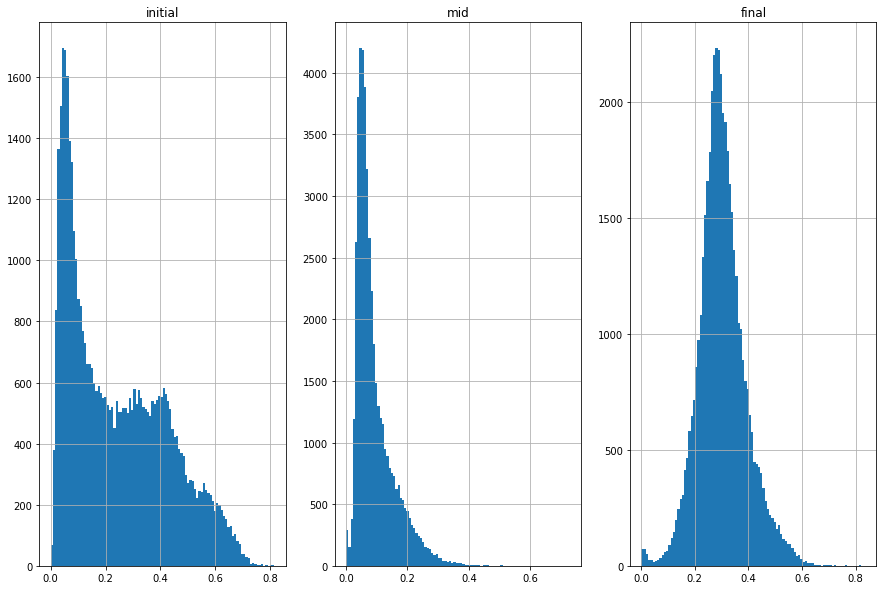

In [5]:
present(folder, "saliency", ['pred_results', 'ok'], but_zeros=False)

#### Incorrect Classification

Mean value of initial beat: 32.38 +- 19.30%
Mean value of mid beat: 14.39 +- 10.25%
Mean value of final beat: 31.41 +- 12.58%


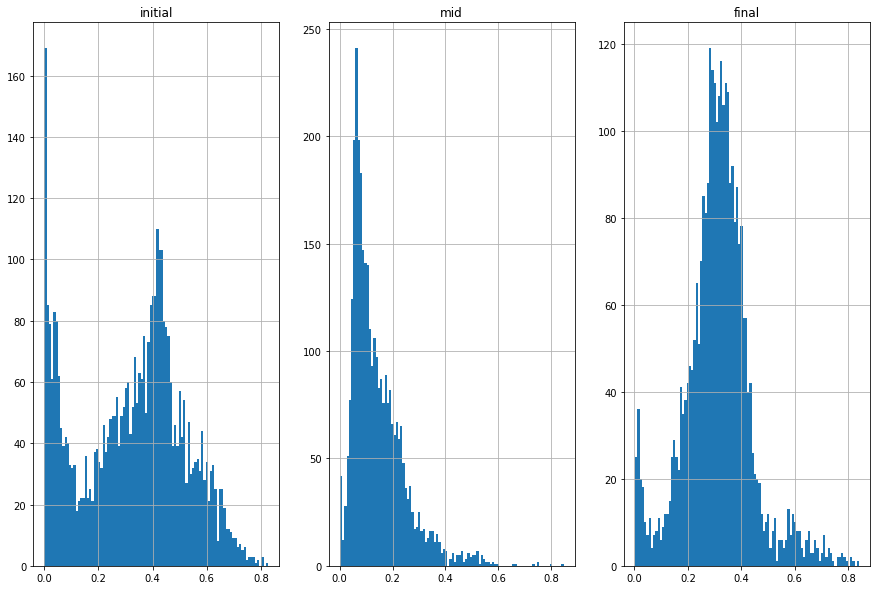

In [6]:
present(folder, "saliency", ['pred_results', 'wrong'], but_zeros=False)

#### Normal Label

Mean value of initial beat: 23.21 +- 17.25%
Mean value of mid beat: 8.62 +- 5.77%
Mean value of final beat: 29.83 +- 8.89%


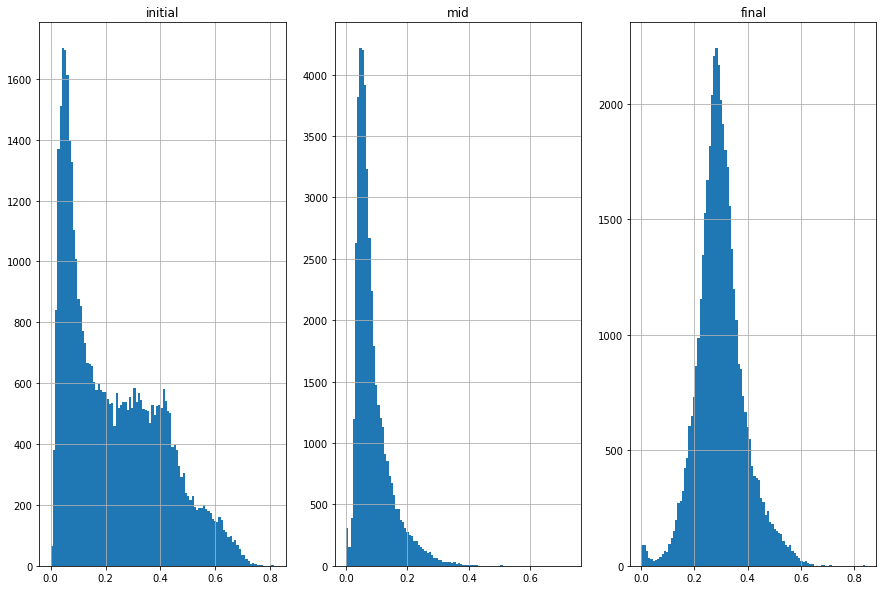

In [7]:
present(folder, "saliency", ['true_labels', 'normal'], but_zeros=False)

#### Abnormal Label

Mean value of initial beat: 39.68 +- 19.32%
Mean value of mid beat: 17.16 +- 8.95%
Mean value of final beat: 34.55 +- 10.32%


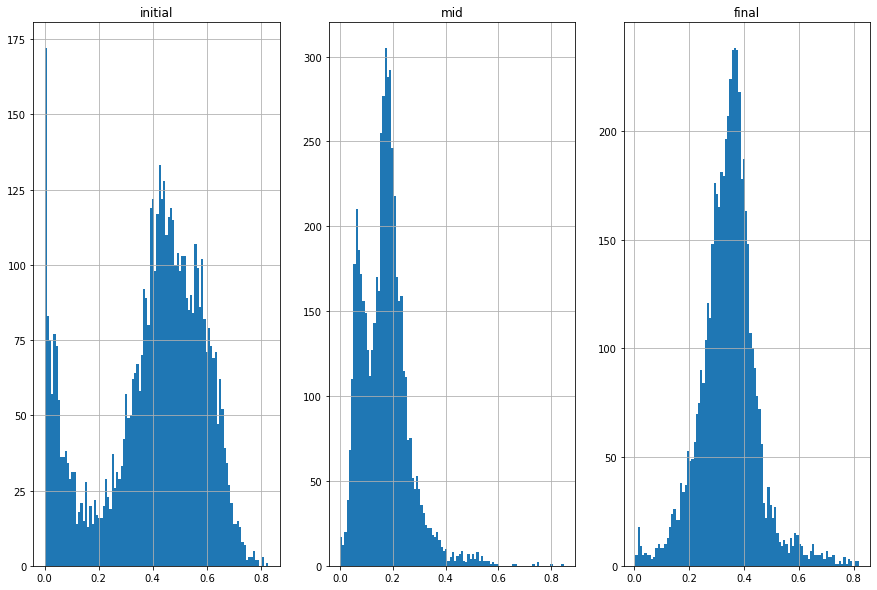

In [8]:
present(folder,"saliency", ['true_labels', 'abnormal'], but_zeros=False)

# Accuracy classification: 
* **final**: 0.9366
* **mid**: 0.9341
* **initial**: 0.9172

# Attention Maps Comparison

In [9]:
#folder = '../../data/attribution_maps/' # RUI
folder_maps = "/mnt/Media/bernardo/attribution_maps_revisited/"

2163_0_233_ok.png


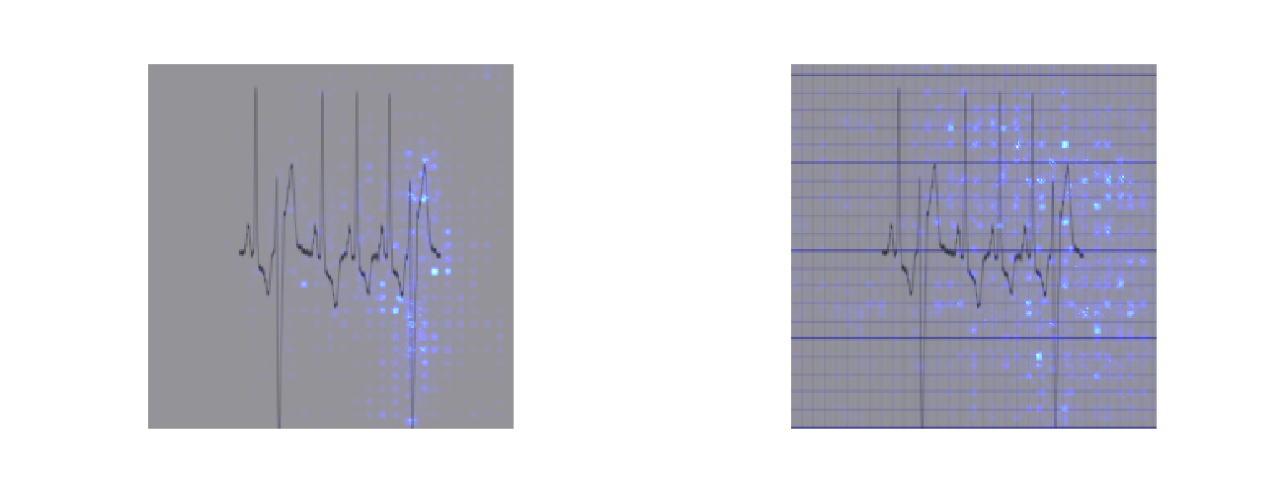

2305_0_233_ok.png


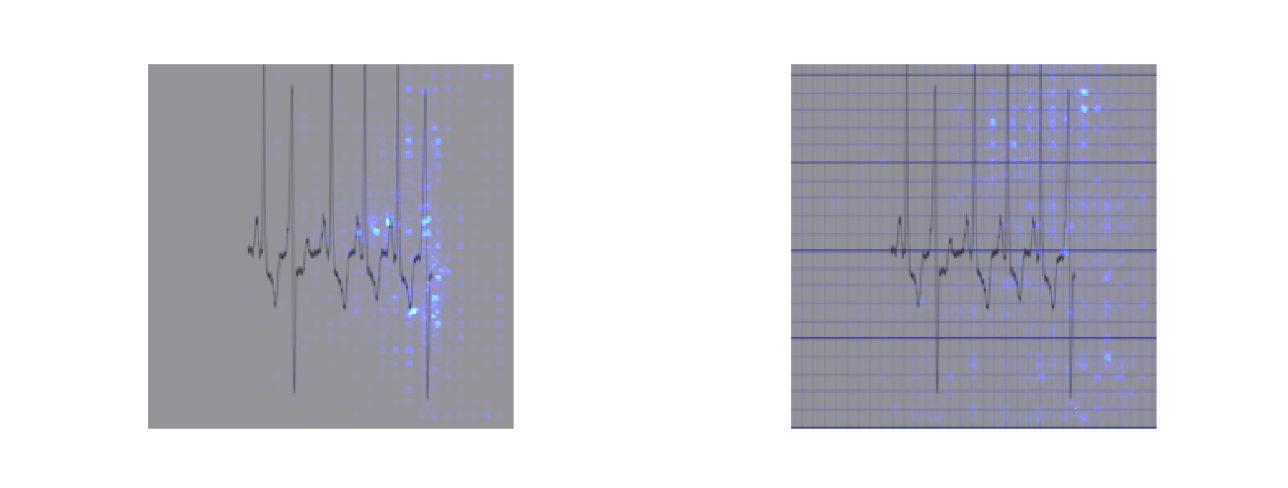

553_0_213_ok.png


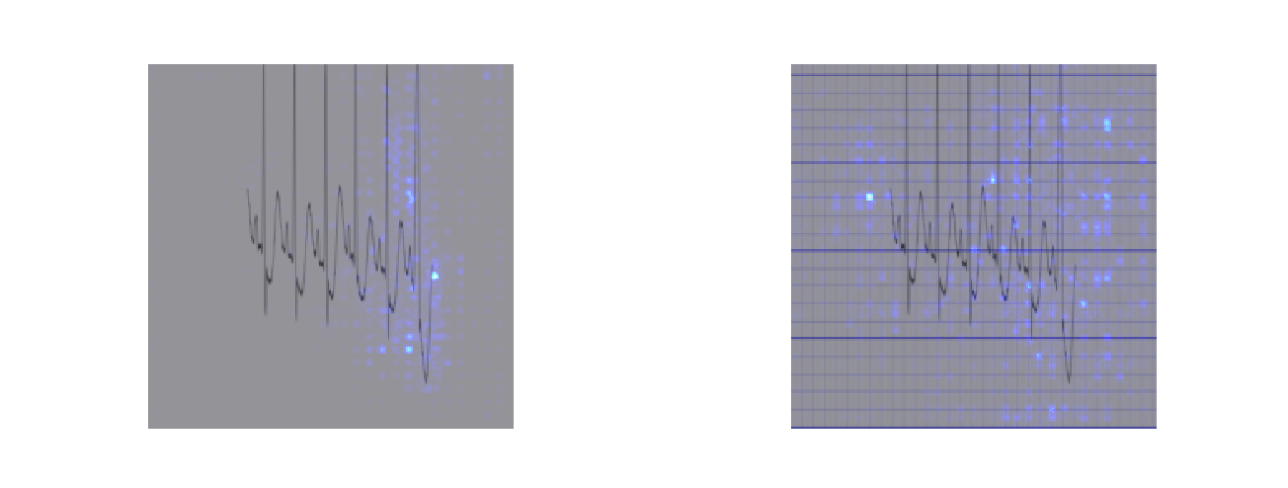

686_0_202_ok.png


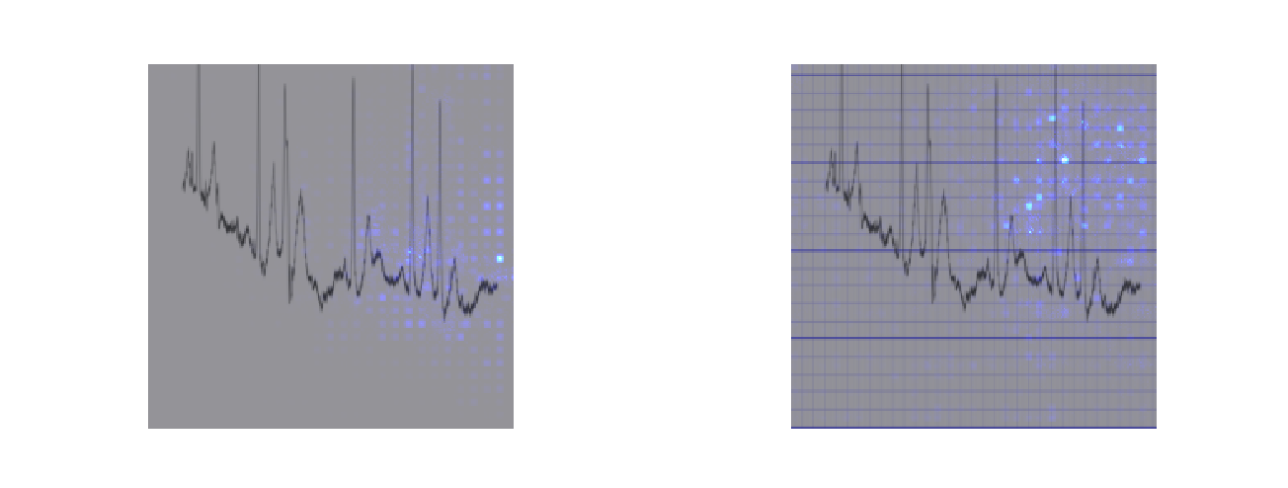

1657_0_213_ok.png


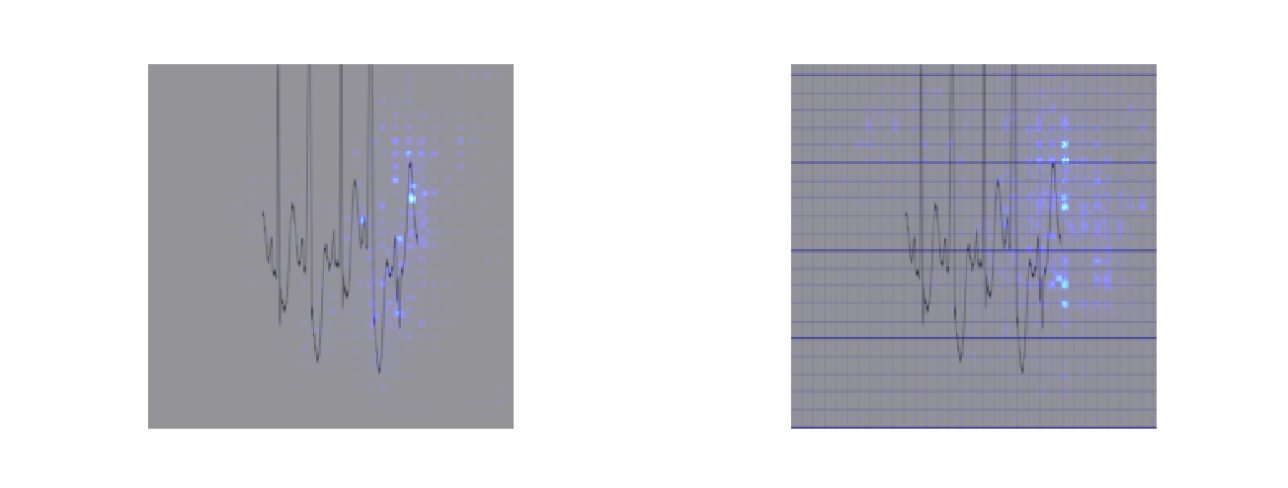

891_0_221_ok.png


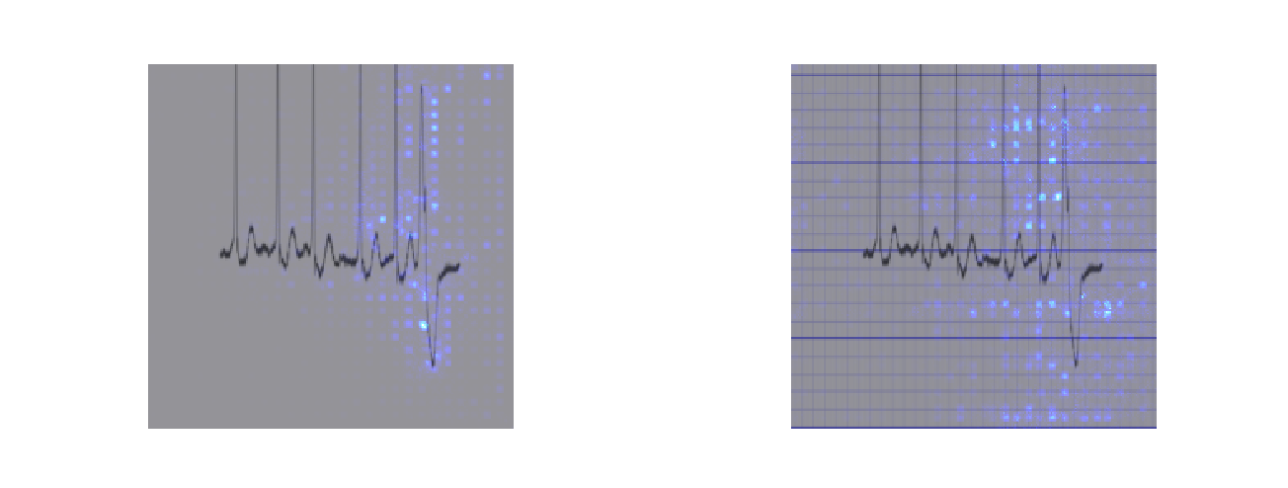

1735_0_200_ok.png


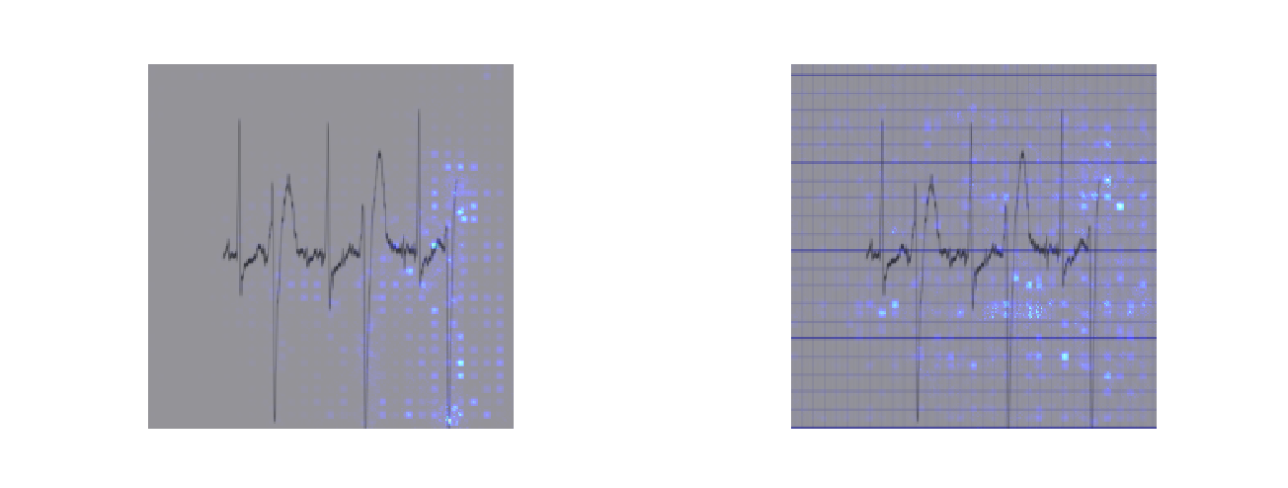

In [11]:
maps_comparison("final", "saliency_map", "abnormal", folder_maps)